# Rising Bubble Notebook

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import subprocess

from importlib import reload
import utils
utils = reload(utils)

import plotting_tools as pt
pt = reload(pt)

## Import the Python output

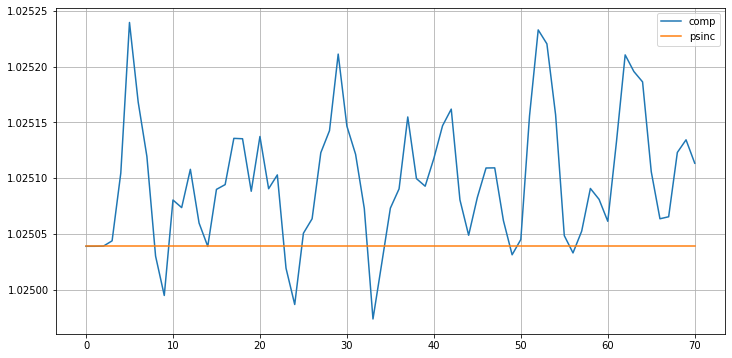

In [2]:
base_fn = "output_rising_bubble"
py_directory = "../%s/" %base_fn

Nx = 100
Ny = 50
et = 3.5
p_ref = 8.61 * 1e4

tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
# suffix = tc.cb_suffix(2,20)
suffix = 'comp'
fn = tc.get_filename(1,suffix)
path = tc.get_path(fn)

steps = np.arange(184)
steps = np.arange(0.0,3.51,0.05)
probe_loc = [40,50]
# probe_loc = [40,67]
comp = []
psinc = []
cb1, cb2 = [], []
attributes = ['rhoY']

cbs1 = [0,3]
cbs2 = [1,0]
for attribute in attributes:
    comp.append(tc.get_time_series(steps,1,attribute,'comp',probe_loc,label_type='TIME',diff=False))
    psinc.append(tc.get_time_series(steps,1,attribute,'psinc',probe_loc,label_type='TIME',diff=False))
    suffix = tc.cb_suffix(cbs1[0],cbs1[1])
#     cb1.append(tc.get_time_series(steps,1,attribute,suffix,probe_loc,label_type='TIME'))
    suffix_cb2 = tc.cb_suffix(cbs2[0],cbs2[1])
#     suffix_cb2 = 'comp'
#     cb2.append(tc.get_time_series(steps,1,attribute,suffix_cb2,probe_loc,label_type='TIME'))
    
comp = comp[0] #* p_ref
psinc = psinc[0] #* p_ref
# cb1 = cb1[0] * p_ref
# cb2 = cb2[0] * p_ref

fig = plt.figure(figsize=(12,6))
plt.plot(comp, label='comp')
plt.plot(psinc, label='psinc')
# plt.plot(cb1, label='cb1 fs=%i,ts=%i' %(cbs1[0],cbs1[1]))
# plt.plot(cb2, label='%s' %(suffix_cb2))
# plt.xlim([0,steps.max()-1])
plt.grid()
plt.legend()
plt.show()

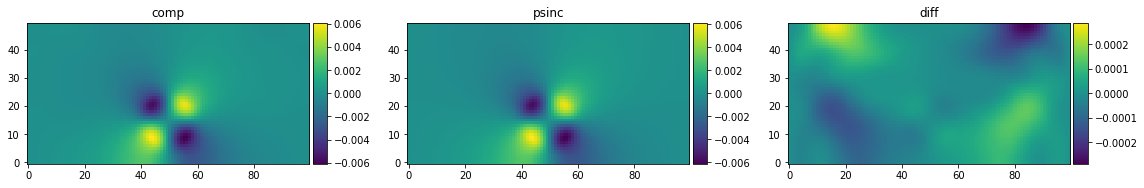

In [384]:
suffixes = ['comp','psinc']
step = 0.50


arr_lst = []
attributes=['p2_nodes']
attributes = ['rhou']
for attribute in attributes:
    for suffix in suffixes:
        fn = tc.get_filename(1,suffix)
        path = tc.get_path(fn)
        arr = tc.get_arr(path, step, 1, attribute, label_type='TIME').T
        title = suffix
        arr_lst.append([arr,title])
        
arr_lst.append([arr_lst[0][0] - arr_lst[1][0],'diff'])

pd = np.copy(arr_lst)

pl = pt.plotter(arr_lst)
pl.plot(figsize=(16,9),method='imshow')

In [71]:
loc = {
            'rho' : 0,
            'rhou' : 0,
            'rhov' : 0,
            'rhow' : 0,
            'rhoY' : 0,
            'rhoX' : 0,
            'p2_nodes' : 2,
        }

ipt = ['rr', 'dd']

# print(ipt in loc)

       
a = [i for i,j in loc.items() if j == 0 and i in ipt]

[]


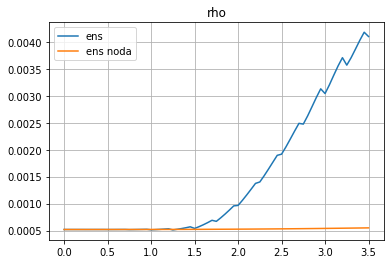

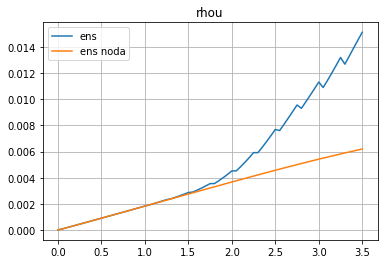

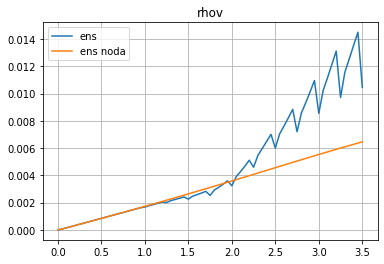

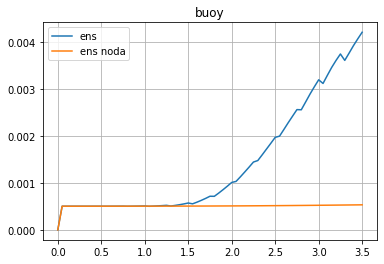

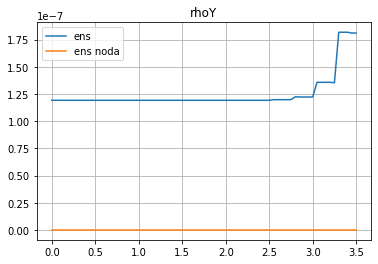

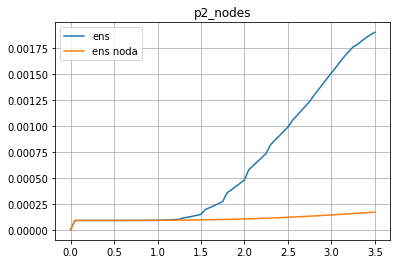

In [113]:
times = np.arange(0.0,3.51,0.05)
attributes = ['rho','rhou','rhov','buoy','rhoY','p2_nodes']

probe_loc = [25,37]

Nx = 100
Ny = 50
et = 3.5
p_ref = 8.61 * 1e4

import scipy.ndimage as sciim

tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
for attribute in attributes:
    ens_noda = []
    # ens_test.append(tc.get_time_series(times,10,attribute,'comp',probe_loc,label_type='TIME'))
#     ens_suffix = 'comp_noda_y0_perturbed'
    ens_noda_suffix = 'psinc_noda_y0_perturbed'
#     ens_suffix = tc.cb_suffix(1,0)
    ens_noda.append(tc.get_ensemble(times, 10, attribute, ens_noda_suffix, label_type='TIME'))
    
    ens_1 = []
    ens_suffix = 'psinc'
#     ens_suffix = tc.cb_suffix(1,0)
    ens_1.append(tc.get_ensemble(times, 10, attribute, ens_suffix, label_type='TIME'))
    
    psinc = []
    psinc.append(tc.get_ensemble(times, 1, attribute, 'psinc', label_type='TIME'))

#     comp = []
#     comp.append(tc.get_ensemble(times, 1, attribute, 'comp', label_type='TIME'))

#     cb1 = []
#     cb1_suffix = tc.cb_suffix(1,0)
#     cb1.append(tc.get_ensemble(times, 1, attribute, cb1_suffix, label_type='TIME'))

    # psincp = [[c,t] for c,t in zip(psinc[0],times)]
    # ppsincp = pt.plotter(psincp)
    # ppsincp.plot(figsize=(12,50))

    # compp = [[c,t] for c,t in zip(comp[0],times)]
    # pcompp = pt.plotter(compp)
    # pcompp.plot(figsize=(12,50))
    
    
#     if attribute == 'rho':
#         for cnt,arr in enumerate(ens_test[0]):
#             ens_test[0][cnt] = sciim.shift(arr,(-1,0))
            
#         ens_testp = [[c,t] for c,t in zip(ens_1[0][::2] - psinc[0][::2],times[::2])]
#         petp = pt.plotter(ens_testp)
#         petp.plot(figsize=(12,50))

    # cb1p = [[c,t] for c,t in zip(cb1[0] - psinc[0],times)]
    # cb1p = pt.plotter(cb1p)
    # cb1p.plot(figsize=(12,50))
    diff_ens = tc.spatially_averaged_rmse(ens_1[0],psinc[0])
    diff_noda = tc.spatially_averaged_rmse(ens_noda[0],psinc[0])
#     diff2 = tc.spatially_averaged_rmse(comp[0],psinc[0])
#     diff3 = tc.spatially_averaged_rmse(cb1[0],psinc[0])

    plt.figure()
    plt.plot(times,diff_ens, label='ens')
    plt.plot(times,diff_noda, label='ens noda')
#     plt.plot(times,diff2, label='comp')
#     plt.plot(times,diff3, label='cb1')
    plt.title("%s" %attribute)
    plt.grid()
    plt.legend()
    plt.show()

In [107]:
AA = np.arange(25).reshape(5,5)
print(AA)
BB = np.pad(AA,([2,2],[0,0]),mode='constant')
print(BB)

DD = [[0,0]]
print(DD*3)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
[[0, 0], [0, 0], [0, 0]]


In [145]:
# open the Python HDF file
pyfile = h5py.File(py_path, 'r')

# make comparisons for the arrays.
# Arguments: C-array (class attribute), Python-array (numpy array), and a title.
# PPP = np.copy(py_out('dp2_nodes'))
# PPP[:,-4:-2] = py_out('dp2_nodes')[:,2:4][::-1]

# diff(c.pnew, PPP, 'dp2_nodes')

inner = (slice(2,-2),slice(2,-2))
iwp = (slice(2,-2),slice(2,-2))
iwp_e = (slice(2,-2),slice(2,-2))
iwp_n = (slice(2,-3),slice(2,-3))
# iwp = (slice(None),slice(None))
if time == t_label + '_' + 'after_ebnaimp':
#     diff(c.hcenter, py_out('hcenter'), 'hcenter')
#     diff(c.wplusx[iwp], py_out('wplusx')[iwp_n], 'wplusx')
#     diff(c.wplusy[iwp], py_out('wplusy')[iwp_n], 'wplusy')
    diff(c.pnew[inner], py_out('p2_full')[inner], 'p2_full', option='na')
#     diff(c.rhs_nodes, py_out('rhs_nodes'), 'rhs_nodes')
#     diff(c.p2_initial, py_out('p2_initial'), 'p2_initial')
    
if time == '001' or time == '005':
    diff(c.flux_x, py_out('rhoYu').T, 'rhoYu')
    diff(c.flux_y, py_out('rhoYv').T, 'rhoYv')
    
# print(py_out('lap_test'))
# fig = plt.figure(figsize=(5,5))
# plt.pcolor(py_out('lap_test'))
# plt.colorbar()
# plt.show()

# diff(c.pnew,py_out('dp2_nodes'),'dp2_nodes')
# diff(c.rhs, py_out('rhs'), 'rhs')
diff(c.p2_nodes,py_out('p2_nodes'),'p2_nodes', option='na')
diff(c.buoy,py_out('X'),'buoy')
# diff(c.dp2_c,py_out('dp2_cells'),'dp2_cells')
# diff(c.p2_c,py_out('p2_cells'),'p2_cells')

diff(c.rho,py_out('rho'),'rho')
# # diff(c.rhoe,py_out('rhoe'),'rhoe')
diff(c.rhoY,py_out('rhoY'),'rhoY')

diff(c.rhou,py_out('rhou'),'rhou', option='na')
# # print(np.argmax(np.abs(c.rhou - py_out('rhou'))))
diff(c.rhov,py_out('rhov'),'rhov')
# diff(c.rhow,py_out('rhow'),'rhow')

# diff(c.u, py_out('u'), 'u')
# diff(c.p, py_out('p'), 'p')
# diff(c.dpdim, py_out('dpdim'), 'dpdim')
diff(c.vortz, py_out('vortz'), 'vortz')

# diff(c.T, py_out('T'), 'T')
# diff(c.dT, py_out('dT'), 'dT')

diff(c.Y, py_out('Y'), 'Y')
# diff(c.dY, py_out('dY'), 'dY')

# print(c.hcenter[:][2:-2,2:-2])
# print(py_out('hcenter')[2:-2,2:-2])

# print(np.where(py_out('p2_initial')[inner] == 0.)[0])

# if time == '004':
#     idx = 0
#     fig = plt.figure(figsize=(9,9))
#     plt.plot(py_out('p2_full')[inner][:,idx], 'r')
#     plt.plot(c.pnew[inner][:,7])
#     plt.xlabel('p2_full')
#     plt.ylabel('error')
#     plt.show()

#     fig = plt.figure(figsize=(9,9))
#     plt.plot((py_out('p2_full') - c.pnew)[inner][:,idx])
#     plt.xlabel('diff')
#     plt.ylabel('error')
#     plt.show()
    
#     fig = plt.figure(figsize=(9,9))
#     plt.plot((py_out('p2_initial')[inner])[:,7])
#     plt.xlabel('p2_initial')
#     plt.ylabel('value')
#     plt.show()
    
#     print(py_out('p2_initial')[inner][2,:][:10])
    
if time == '002':
    idx = 1
    fig = plt.figure(figsize=(9,9))
    plt.plot(py_out('rhou')[:,idx],'r', label='python-output')
    plt.plot(c.rhou[:,idx],'k', label='c-output')
    plt.title('rhou, sliced at idx %i' %idx )
    plt.ylabel('rhou')
    plt.xlabel('x')
    plt.legend()
    plt.show()
    
    fig = plt.figure(figsize=(9,9))
    plt.plot((py_out('rhou') - c.rhou)[:,idx])
    plt.title('difference in rhou outputs, sliced at idx %i' %idx )
    plt.xlabel('diff')
    plt.ylabel('error')
    plt.show()
    
    
if time == '007':
    idx = 10
    fig = plt.figure(figsize=(9,9))
#     plt.plot((py_out('p2_nodes') - c.p2_nodes)[:,idx])
#     plt.plot(py_out('rhou')[:,idx][:2],'r', label='python-output')
#     plt.plot(c.rhou[:,idx][:2],'k', label='c-output')
    plt.plot((py_out('rhou') - c.rhou)[:,idx][:5])
    plt.title('difference in rhou outputs, sliced at idx %i' %idx )
    plt.xlabel('diff')
    plt.ylabel('error')
    plt.show()
    
if time == '005':
    idx = 3
    fig = plt.figure(figsize=(9,9))
    plt.plot((py_out('rhoYu').T - c.flux_x)[:,idx])
    plt.title('difference in rhoYu outputs, sliced at idx %i' %idx )
    plt.xlabel('diff')
    plt.ylabel('error')
    plt.show()
    
if time == '003':
    idx = 100
    fig = plt.figure(figsize=(9,9))
    plt.plot(py_out('rhov')[idx,:], '-ro',label='python')
    plt.plot(c.rhov[idx,:], '-bo',label='c')
    plt.title("rhov sliced at the 100th row (i.e. at x = 100)")
    plt.xlabel("y")
    plt.ylabel("rhov")
    plt.legend()
    plt.show()
    
# if time == t_label + '_' + 'after_half_step':
# idx = 7
# fig = plt.figure(figsize=(15,9))
# # plt.plot(py_out('rhou')[:,idx],'r', label='python-output')
# # plt.plot(c.rhou[:,idx],'k', label='c-output')
# plt.plot((py_out('rhou') - c.rhou)[:,idx], label='diff profile')
# plt.title('difference in rhou outputs, sliced at idx %i' %idx )
# plt.xlabel('diff')
# plt.ylabel('error')
# plt.legend()
# plt.show()

# idx = 12
# fig = plt.figure(figsize=(15,9))
# # plt.plot(py_out('p2_nodes')[:,idx],'r', label='python-output')
# # plt.plot(c.p2_nodes[:,idx],'k', label='c-output')
# plt.plot((py_out('p2_nodes') - c.p2_nodes)[:,idx], label='diff profile')
# plt.title('difference in p2_nodes outputs, sliced at idx %i' %idx )
# plt.xlabel('diff')
# plt.ylabel('error')
# plt.legend()
# plt.show()

# idx = 100
# fig = plt.figure(figsize=(15,9))
# plt.plot(py_out('p2_full')[inner][idx,:],'r', label='python-output')
# plt.plot(c.pnew[inner][idx,:],'k', label='c-output')
# # plt.plot((py_out('p2_nodes') - c.p2_nodes)[:,idx], label='diff profile')
# plt.title('difference in p2_nodes outputs, sliced at idx %i' %idx )
# plt.xlabel('diff')
# plt.ylabel('error')
# plt.legend()
# plt.show()

pyfile.close()

NameError: name 'py_path' is not defined

In [147]:
print((np.random.random()-.5)/20)

0.006418198310177181


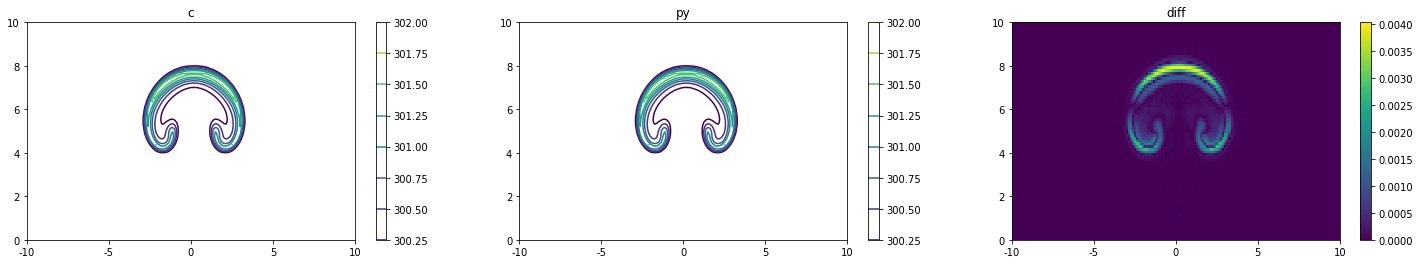

In [8]:
# plt.contour(c.rhoY[:].T / c.rho[:].T)
# plt.contour(c.rho[:].T)

# idx = 22
lvls = np.arange(300.25,302.01,0.25)
pyfile = h5py.File(py_path, 'r')
# fig = plt.figure(figsize=(16,8))
# # plt.pcolor(c.rhoY[:].T / c.rho[:].T * 300)
# plt.contour(py_out('rhoY').T / py_out('rho').T * 300, levels=lvls)
# plt.contour(c.rhoY[:].T / c.rho[:].T * 300, levels=lvls)
# # plt.contour((c.rhoY[:].T / c.rho[:].T  - py_out('rhoY').T / py_out('rho').T) * 300  )
# # plt.plot(py_out('rho').T[idx],label='py')
# # plt.plot(c.rho[:].T[idx],label='c')
# # plt.plot(c.rho[:].T[idx] - py_out('rho').T[idx])
# # plt.legend()
# # plt.vlines(82, 0, 80)
# # plt.hlines(64,0,160)
# # plt.contour(py_out('X').T)
# plt.colorbar()
# plt.ylim([0,80])
# plt.xlim([0,160])
# plt.yticks([0,16,32,48,64,80],np.arange(0,11,2))
# plt.xticks([0,40,80,120,160],np.arange(-10,10+1,5))
# plt.show()
# print(pyfile['rhoY'].keys())

figsize_tuple = (25,4)
fig, ax = plt.subplots(ncols=3, figsize=figsize_tuple)
# plot c array
im_c = ax[0].contour(c.rhoY[:].T / c.rho[:].T * 300, levels=lvls)
fig.colorbar(im_c,ax=ax[0])
ax[0].set_title("c")
ax[0].set_aspect('auto')
ax[0].set_xticks([0,40,80,120,160])
ax[0].set_xticklabels(np.arange(-10,10+1,5))
ax[0].set_xlim([0,160])

# plot python array
im_py = ax[1].contour(py_out('rhoY').T / py_out('rho').T * 300, levels=lvls)
fig.colorbar(im_py,ax=ax[1])
ax[1].set_title("py")
ax[1].set_aspect('auto')

# plot the difference between the two
im_diff = ax[2].pcolor(np.abs(c.rhoY[:].T / c.rho[:].T * 300 - py_out('rhoY').T / py_out('rho').T * 300))
fig.colorbar(im_diff,ax=ax[2])
ax[2].set_title("diff")
ax[2].set_aspect('auto')

plt.setp(ax, xlim=[0,160], ylim=[0,80], xticks=[0,40,80,120,160], xticklabels=np.arange(-10,10+1,5), yticks=[0,16,32,48,64,80], yticklabels=np.arange(0,11,2))

pyfile.close()